# songs.csv
The songs. Note that data is in unicode.

- song_id
- song_length: in ms
- genre_ids: genre category. Some songs have multiple genres and they are separated by |
- artist_name
- composer
- lyricist
- language

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

In [3]:
songs=pd.read_csv('data/songs.csv')
print(songs.head())
print(songs.info())

                                        song_id  song_length genre_ids  \
0  CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=       247640       465   
1  o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=       197328       444   
2  DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=       231781       465   
3  dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=       273554       465   
4  W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=       140329       726   

        artist_name                            composer     lyricist  language  
0  張信哲 (Jeff Chang)                                  董貞          何啟弘       3.0  
1         BLACKPINK  TEDDY|  FUTURE BOUNCE|  Bekuh BOOM        TEDDY      31.0  
2      SUPER JUNIOR                                 NaN          NaN      31.0  
3             S.H.E                                 湯小康          徐世珍       3.0  
4              貴族精選                         Traditional  Traditional      52.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 

In [4]:
#Import song extra information
songs_extra=pd.read_csv('data/song_extra_info.csv')
songs_extra.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [5]:
#Create a dataframe with all information regarding songs: songs_full
songs_full=pd.merge(songs,songs_extra, on='song_id', how='left')
print(songs_full.head())
print(songs_full.info())

                                        song_id  song_length genre_ids  \
0  CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=       247640       465   
1  o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=       197328       444   
2  DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=       231781       465   
3  dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=       273554       465   
4  W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=       140329       726   

        artist_name                            composer     lyricist  \
0  張信哲 (Jeff Chang)                                  董貞          何啟弘   
1         BLACKPINK  TEDDY|  FUTURE BOUNCE|  Bekuh BOOM        TEDDY   
2      SUPER JUNIOR                                 NaN          NaN   
3             S.H.E                                 湯小康          徐世珍   
4              貴族精選                         Traditional  Traditional   

   language                    name          isrc  
0       3.0                      焚情  TWB531410010  
1      31.0       

In [6]:
#Check how many missing values there are in each column
songs_full.isnull().sum()

song_id              0
song_length          0
genre_ids        94116
artist_name          0
composer       1071354
lyricist       1945268
language             1
name               900
isrc            137428
dtype: int64

In [7]:
#Count number of songs per language
songs_full.groupby('language').song_id.count()

language
-1.0      639467
 3.0      106295
 10.0      15482
 17.0      92518
 24.0      41744
 31.0      39201
 38.0       2385
 45.0      14435
 52.0    1336694
 59.0       8098
Name: song_id, dtype: int64

In [8]:
#Replace missing language values for -1
songs_full['language'].fillna(-1, inplace=True)
#Remove decimals from language values
songs_full['language']=songs_full['language'].astype(int)
#Transform language into categorical variable
songs_full['language']=songs_full['language'].astype('category')
print(songs_full.head())
print(songs_full.info())

                                        song_id  song_length genre_ids  \
0  CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=       247640       465   
1  o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=       197328       444   
2  DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=       231781       465   
3  dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=       273554       465   
4  W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=       140329       726   

        artist_name                            composer     lyricist language  \
0  張信哲 (Jeff Chang)                                  董貞          何啟弘        3   
1         BLACKPINK  TEDDY|  FUTURE BOUNCE|  Bekuh BOOM        TEDDY       31   
2      SUPER JUNIOR                                 NaN          NaN       31   
3             S.H.E                                 湯小康          徐世珍        3   
4              貴族精選                         Traditional  Traditional       52   

                     name          isrc  
0                      焚情 

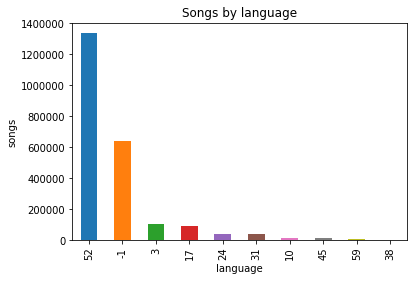

In [25]:
#Plot number of songs by language
songs_by_language=songs_full.groupby('language').song_id.count().sort_values(ascending=False)
songs_by_language.plot(kind='bar')
plt.title('Songs by language')
plt.ylabel('songs')
plt.show()

In [10]:
#Explore entries with language=-1
songs_full[songs_full['language']==-1].head(100)

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc
12,fAZLdfQaLG76a6Ei4alt1eSjBM9rshQkiQEC6+n+y08=,180871,726,Littlesong,Michael William Balfe,NaN,-1,I dreamt I dwelt In Marble halls| From The Boh...,KRB361434193
18,JcHIgDP5ivyqYIn7RxfXM13eWwOzcoxkWosSauz6RbU=,374027,726,White Noise,NaN,NaN,-1,White Noise Designed for Babies Short,TCABE1295185
28,+dOlHQGlsiHPbG1cMYsoFVsAi05YgsGfeEzsdS16yec=,368441,1609,Marvin Gaye & Kygo,Marvin Gaye| Odell Brown| David Ritz,Marvin Gaye| Odell Brown| David Ritz,-1,Sexual Healing,USSM11409378
44,/pNJtPeT5RixL9cwAScQ83XG6lzNjQbxXdz9Bxm3UCk=,954851,873,蘇曼竹巴仁波切,公版,公版,-1,噶瑪巴千諾,TWE350908101
54,vLLKr+iN+vepbTD6W2kDXHvuqmGiXGdXRRHLjRp0pCQ=,300257,873,原力歌手,王苒馨,公版,-1,佈施加持,TWE359800104
61,m86acAJ3Bj2fL+4vbwWPHmOlrxF1Bk9F34/6kj5JpjI=,293511,786|947,寶寶水晶音樂,NaN,NaN,-1,爸比媽咪永遠的愛 (Promise)/ 晶瑩剔透的琴聲，無瑕的愛,NaN
81,vBICG1rGbS2Cfj+/bAQFb+5IYVKhdLOGcnN3nlel728=,38359,726,50 Best Children's Classics,NaN,NaN,-1,Mary Had a Lamb,TCAAY1103687
83,I/La/znX36CnxSjgTQZnz5G/q9Xf02TMY5oPnRkzSjE=,270048,2122,Kenny G,NaN,NaN,-1,The Music That Makes Me Dance,USAR10401199
89,oO+abG+WVeSmJlb9LLUZlg9GiCFuZ+AsMEGVlR33BFg=,330884,786|947,李欣芸 (CinCin Lee),許嫚烜,NaN,-1,是名 愛,TWC010301210
93,skCaG6fywLmpJaTNeqL89sis3vUydYzd+HLnBy9DsiE=,199645,1609|2107,David Guetta,David Guetta| Giorgio H. Tuinfort,NaN,-1,Turn Me On (feat. Nicki Minaj),GB28K1100029


After investigating further the language, in some cases -1 means that the song only has a melody e.g. Canon in D from Pachelbel, but in other cases like Sexual Healing the song has not been categorized. 
We will keep -1 values as it is not clear what transformation needs to be done in each case.

In [11]:
#Transform song_length into minutes
songs_full['song_length_min']=songs_full['song_length'].map(lambda x: x/60000)

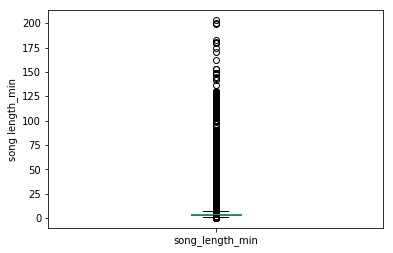

In [12]:
#Box plot for song length
songs_full['song_length_min'].plot(kind='box')
plt.ylabel('song length_min')
plt.show()

In [13]:
#Explore songs with high lengths (more than 1 hours long)
songs_full[songs_full['song_length_min']>60]

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc,song_length_min
3842,vuQLGvIKlusnjXwmzH+NSI5FymhjBJgW8gVhY2l2LAU=,3903530,1152,Spa & Spa,Neuromancer,NaN,-1,Luxury Spa,ITO101456334,65.058833
5149,UEjh6tuLXUPY24Ch9GNwgIwsLg6t22rp5rMLi8aQcYE=,4025318,1609,Various Artists,NaN,NaN,52,Continuous Mix,HKA131600001,67.088633
18244,WXmWsgK/VLO6i4kRzanc8QPey7EDigglvPfCSnf25YY=,3629975,873,佛教國語課誦系列,NaN,NaN,-1,藥師經,NaN,60.499583
25740,w8SSKfXHI0aCcfdefWH4tpmUouHj3Y7mp/q1zT51UBw=,4748341,873,彌勒救苦真經,NaN,NaN,-1,彌勒救苦真經(國語版),NaN,79.139017
27009,w3paK86tdZBDBfQxjpO2MpZQlzZEtGZa8KVNhlAHdeE=,4613433,1609,Deep Dish,NaN,NaN,52,Renaissance - The Masters Series - Part 2 - Ib...,GBVVQ1027689,76.890550
27610,YMD/4BLDPOjUIBc1GIgJbi7PoGFUSk25iWWXI+BBP2E=,3725845,388,Baby Sleep Lullaby Academy| Bedtime Songs Acad...,Sacchetto G.,NaN,-1,Showers,PLL431497196,62.097417
50981,vc94cwXuMVpw23uPYEiBxtL1wgymIMlOSBTDhe/Q4xM=,3878011,940,i-Reiki,Emmanuele Landini,NaN,-1,Reiki| Vol. 2,FR6V82072432,64.633517
53952,GHmQvQVvhM2d431iiH5UiWVyDOipRnhrbTDbfSwc+2M=,3659363,940,Dr. Jeffrey Thompson,NaN,NaN,-1,Sleepy Ocean (Album Version),US34D0700083,60.989383
55513,U382L1hiTmxTisix+WcZgWseI4EcI9gvtHRPWJm9gjc=,4144378,1609,Various Artists,NaN,NaN,-1,All Trap Music 3 Continuous Mix 2,GB2LD0901700,69.072967
59732,V+6LfKYl34Hk3VK01mMCfj3KFOUc6i/YUE8C6HXjrGQ=,6448901,1609,La Nuit The Finest Of Chill House Lounge by DJ...,NaN,NaN,-1,The Finest Of Chill House Lounge by DJ Jondal ...,DES310900488,107.481683


In [14]:
songs_full.describe()

,song_length,song_length_min
count,2.296320e+06,2.296320e+06
mean,2.469935e+05,4.116558e+00
std,1.609200e+05,2.682000e+00
min,1.850000e+02,3.083333e-03
25%,1.836000e+05,3.060000e+00
50%,2.266270e+05,3.777117e+00
75%,2.772690e+05,4.621150e+00
max,1.217385e+07,2.028975e+02


After searching some of the songs with outlayers in the song_length, I have checked that the length is correct. Songs with long lengths seem to correspond to playlists.

In [15]:
#Clean format of artist_name, lyricist and composer column: capitalize first letters and remove extra spaces
columns_to_clean=['artist_name','lyricist','composer']
for item in columns_to_clean:
    songs_full[item]=songs_full[item].map(lambda x: str(x).strip())
    songs_full[item]=songs_full[item].map(lambda x: str(x).title())
    songs_full[item]=songs_full[item].map(lambda x: re.sub(' +',' ',x))
    songs_full[item]=songs_full[item].map(lambda x: str(x).replace('| ','|'))

In [16]:
#Bring back missing values
songs_full.replace('Nan',np.nan, inplace=True)
print(songs_full.head(30))

                                         song_id  song_length  \
0   CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=       247640   
1   o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=       197328   
2   DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=       231781   
3   dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=       273554   
4   W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=       140329   
5   kKJ2JNU5h8rphyW21ovC+RZU+yEHPM+3w85J37p7vEQ=       235520   
6   N9vbanw7BSMoUgdfJlgX1aZPE1XZg8OS1wf88AQEcMc=       226220   
7   GsCpr618xfveHYJdo+E5SybrpR906tsjLMeKyrCNw8s=       276793   
8   oTi7oINPX+rxoGp+3O6llSltQTl80jDqHoULfRoLcG4=       228623   
9   btcG03OHY3GNKWccPP0auvtSbhxog/kllIIOx5grE/k=       232629   
10  HulM/OaHgD5kUyjNQjDUf8VZdsy7h4EJUIff79Cifwo=       272544   
11  wypPzqFNdUJAqyBVxmFGaK4z7krUNWr5YqA0q0wi9eE=       254880   
12  fAZLdfQaLG76a6Ei4alt1eSjBM9rshQkiQEC6+n+y08=       180871   
13  tqBlH4r/q1Tf6C5+C6ucjGlLjMbfu5yjqB6ifRzy5dc=       257602   
14  an6EdIr+Z+KbqIVQiXn5P

In [17]:
#Check how songs are grouped by genre
songs_full.groupby('genre_ids').song_id.count()

genre_ids
1000                            89
1000|2154|751                    6
1007                           693
1011                         34013
1011|2189|367                    4
1011|359                        24
1011|691                        19
1019                          1299
1026                           845
1033                            80
1040                          1146
1040|1138                       30
1040|1152                       13
1040|1155                      281
1040|2022                        5
1040|2122                        6
1040|275|1572                    1
1040|423                         1
1040|444                         3
1040|465                         6
1040|786                        21
1047                          1065
1047|423                         3
1054                           712
1054|815                         4
1061                            61
1068                           957
1068|1096                        2
1082      

In [18]:
#Transform genre_ids, composter and lyricits in list of items
for item in ['genre_ids','composer','lyricist']:
    songs_full[item]=songs_full[item].str.split(pat='|')
songs_full.head(30)

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc,song_length_min
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,[465],張信哲 (Jeff Chang),[董貞],[何啟弘],3,焚情,TWB531410010,4.127333
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,[444],Blackpink,"[Teddy, Future Bounce, Bekuh Boom]",[Teddy],31,PLAYING WITH FIRE,NaN,3.288800
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,[465],Super Junior,NaN,NaN,31,SORRY| SORRY,NaN,3.863017
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,[465],S.H.E,[湯小康],[徐世珍],3,愛我的資格,TWC950206108,4.559233
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,[726],貴族精選,[Traditional],[Traditional],52,Mary Had a Little Lamb,NaN,2.338817
5,kKJ2JNU5h8rphyW21ovC+RZU+yEHPM+3w85J37p7vEQ=,235520,"[864, 857, 850, 843]",貴族精選,[Joe Hisaishi],[Hayao Miyazaki],17,となりのトトロ,NaN,3.925333
6,N9vbanw7BSMoUgdfJlgX1aZPE1XZg8OS1wf88AQEcMc=,226220,[458],伍佰 & China Blue,[Jonathan Lee],NaN,3,夢醒時分,TWH951100012,3.770333
7,GsCpr618xfveHYJdo+E5SybrpR906tsjLMeKyrCNw8s=,276793,[465],光良 (Michael Wong),[光良],[彭資閔],3,記得我愛你,TWA450582110,4.613217
8,oTi7oINPX+rxoGp+3O6llSltQTl80jDqHoULfRoLcG4=,228623,[465],林俊傑 (Jj Lin),[Jj Lin],[Wu Qing Feng],3,裂縫中的陽光 (Before Sunrise),TWA531398021,3.810383
9,btcG03OHY3GNKWccPP0auvtSbhxog/kllIIOx5grE/k=,232629,"[352, 1995]",Kodaline,"[Stephen Garrigan, Mark Prendergast, Vincent M...","[Stephen Garrigan, Mark Prendergast, Vincent M...",52,The One,GBARL1401580,3.877150


In [22]:
#include column with number of genres a song belongs to: genre_count
songs_full['genre_count']=songs_full['genre_ids'].apply(lambda x: len(x) if np.all(pd.notnull(x)) else x)

In [20]:
songs_full.head(30)

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc,song_length_min,genre_count
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,[465],張信哲 (Jeff Chang),[董貞],[何啟弘],3,焚情,TWB531410010,4.127333,1.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,[444],Blackpink,"[Teddy, Future Bounce, Bekuh Boom]",[Teddy],31,PLAYING WITH FIRE,NaN,3.288800,1.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,[465],Super Junior,NaN,NaN,31,SORRY| SORRY,NaN,3.863017,1.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,[465],S.H.E,[湯小康],[徐世珍],3,愛我的資格,TWC950206108,4.559233,1.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,[726],貴族精選,[Traditional],[Traditional],52,Mary Had a Little Lamb,NaN,2.338817,1.0
5,kKJ2JNU5h8rphyW21ovC+RZU+yEHPM+3w85J37p7vEQ=,235520,"[864, 857, 850, 843]",貴族精選,[Joe Hisaishi],[Hayao Miyazaki],17,となりのトトロ,NaN,3.925333,4.0
6,N9vbanw7BSMoUgdfJlgX1aZPE1XZg8OS1wf88AQEcMc=,226220,[458],伍佰 & China Blue,[Jonathan Lee],NaN,3,夢醒時分,TWH951100012,3.770333,1.0
7,GsCpr618xfveHYJdo+E5SybrpR906tsjLMeKyrCNw8s=,276793,[465],光良 (Michael Wong),[光良],[彭資閔],3,記得我愛你,TWA450582110,4.613217,1.0
8,oTi7oINPX+rxoGp+3O6llSltQTl80jDqHoULfRoLcG4=,228623,[465],林俊傑 (Jj Lin),[Jj Lin],[Wu Qing Feng],3,裂縫中的陽光 (Before Sunrise),TWA531398021,3.810383,1.0
9,btcG03OHY3GNKWccPP0auvtSbhxog/kllIIOx5grE/k=,232629,"[352, 1995]",Kodaline,"[Stephen Garrigan, Mark Prendergast, Vincent M...","[Stephen Garrigan, Mark Prendergast, Vincent M...",52,The One,GBARL1401580,3.877150,2.0


In [21]:
#Check how many missing values there are in each column
songs_full.isnull().sum()

song_id                  0
song_length              0
genre_ids            94116
artist_name              0
composer           1071355
lyricist           1945268
language                 0
name                   903
isrc                137428
song_length_min          0
genre_count          94116
dtype: int64

In [23]:
#Select needed columns to export: songs_clean
songs_clean=songs_full[['song_id','song_length_min','genre_ids','artist_name','composer','lyricist','language','genre_count']]
print(songs_clean.head())

                                        song_id  song_length_min genre_ids  \
0  CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=         4.127333     [465]   
1  o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=         3.288800     [444]   
2  DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=         3.863017     [465]   
3  dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=         4.559233     [465]   
4  W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=         2.338817     [726]   

        artist_name                            composer       lyricist  \
0  張信哲 (Jeff Chang)                                [董貞]          [何啟弘]   
1         Blackpink  [Teddy, Future Bounce, Bekuh Boom]        [Teddy]   
2      Super Junior                                 NaN            NaN   
3             S.H.E                               [湯小康]          [徐世珍]   
4              貴族精選                       [Traditional]  [Traditional]   

  language  genre_count  
0        3          1.0  
1       31          1.0  
2       

In [24]:
#Export clean file as songs_clean.csv
songs_clean.to_csv('data/songs_clean.csv', index=False)